# In this file we are going to use Functional API

In [7]:
from helper_functions import create_tensorboard_callback, plot_loss_curves, unzip_data, walk_through_dir

In [8]:
# Walk through 10 percent data directory and list number of files
walk_through_dir("10_food_classes_10_percent")

There are 2 directories and 0 images in '10_food_classes_10_percent'.
There are 10 directories and 0 images in '10_food_classes_10_percent/test'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/steak'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/sushi'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test

In [9]:
# Create training and test directories
train_dir = "10_food_classes_10_percent/train/"
test_dir = "10_food_classes_10_percent/test/"

In [10]:
# Create data inputs
import tensorflow as tf
IMG_SIZE = (224, 224) # define image size
train_data_10_percent = tf.keras.preprocessing.image_dataset_from_directory(directory=train_dir,
                                                                            image_size=IMG_SIZE,
                                                                            label_mode="categorical", # what type are the labels?
                                                                            batch_size=32) # batch_size is 32 by default, this is generally a good number
test_data_10_percent = tf.keras.preprocessing.image_dataset_from_directory(directory=test_dir,
                                                                           image_size=IMG_SIZE,
                                                                           label_mode="categorical")

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [11]:
# Check out the class names of our dataset
train_data_10_percent.class_names

['chicken_curry',
 'chicken_wings',
 'fried_rice',
 'grilled_salmon',
 'hamburger',
 'ice_cream',
 'pizza',
 'ramen',
 'steak',
 'sushi']

In [12]:
base_model = tf.keras.applications.efficientnet_v2.EfficientNetV2B0(include_top=False)
base_model.trainable = False

inputs = tf.keras.layers.Input(shape=(224,224,3), name="Input_layer")

x = base_model(inputs)
print(f"Shape after base_model: {x.shape}")

x = tf.keras.layers.GlobalAveragePooling2D(name="Global_Avg_pooling_layer")(x)
print(f"After GlobalAveragePooling2D(): {x.shape}")

outputs = tf.keras.layers.Dense(10, activation="softmax", name="Output_layer")(x)

model_0 = tf.keras.Model(inputs, outputs)

model_0.compile(loss="categorical_crossentropy",
               optimizer=tf.keras.optimizers.legacy.Adam(),
               metrics=["accuracy"])

history_0 = model_0.fit(train_data_10_percent,
                        epochs=5,
                        steps_per_epoch=len(train_data_10_percent),
                        validation_data=test_data_10_percent,
                        validation_steps=int(0.25 * len(test_data_10_percent)))
                # we are only validating 25% data just for it to be quicker optional

24274472/24274472 [==============================] - 5s 0us/step
Shape after base_model: (None, 7, 7, 1280)
After GlobalAveragePooling2D(): (None, 1280)
Epoch 1/5


2023-11-06 18:32:24.839495: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


24/24 [==============================] - 48s 1s/step - loss: 1.8990 - accuracy: 0.3920 - val_loss: 1.3534 - val_accuracy: 0.7352
Epoch 2/5
24/24 [==============================] - 7s 283ms/step - loss: 1.2025 - accuracy: 0.7333 - val_loss: 0.9325 - val_accuracy: 0.8339
Epoch 3/5
24/24 [==============================] - 7s 282ms/step - loss: 0.8928 - accuracy: 0.7973 - val_loss: 0.7506 - val_accuracy: 0.8520
Epoch 4/5
24/24 [==============================] - 7s 284ms/step - loss: 0.7489 - accuracy: 0.8400 - val_loss: 0.6612 - val_accuracy: 0.8553
Epoch 5/5
24/24 [==============================] - 7s 289ms/step - loss: 0.6553 - accuracy: 0.8520 - val_loss: 0.5794 - val_accuracy: 0.8717


In [13]:
# evaluate on full test data 
model_0.evaluate(test_data_10_percent)

79/79 [==============================] - 22s 273ms/step - loss: 0.5769 - accuracy: 0.8624


[0.5769075155258179, 0.8623999953269958]

In [14]:
# checking layer in base model
for layer_number, layer in enumerate(base_model.layers):
    print(layer_number,layer.name)

0 input_1
1 rescaling
2 normalization
3 stem_conv
4 stem_bn
5 stem_activation
6 block1a_project_conv
7 block1a_project_bn
8 block1a_project_activation
9 block2a_expand_conv
10 block2a_expand_bn
11 block2a_expand_activation
12 block2a_project_conv
13 block2a_project_bn
14 block2b_expand_conv
15 block2b_expand_bn
16 block2b_expand_activation
17 block2b_project_conv
18 block2b_project_bn
19 block2b_drop
20 block2b_add
21 block3a_expand_conv
22 block3a_expand_bn
23 block3a_expand_activation
24 block3a_project_conv
25 block3a_project_bn
26 block3b_expand_conv
27 block3b_expand_bn
28 block3b_expand_activation
29 block3b_project_conv
30 block3b_project_bn
31 block3b_drop
32 block3b_add
33 block4a_expand_conv
34 block4a_expand_bn
35 block4a_expand_activation
36 block4a_dwconv2
37 block4a_bn
38 block4a_activation
39 block4a_se_squeeze
40 block4a_se_reshape
41 block4a_se_reduce
42 block4a_se_expand
43 block4a_se_excite
44 block4a_project_conv
45 block4a_project_bn
46 block4b_expand_conv
47 block

In [15]:
base_model.summary()

Model: "efficientnetv2-b0"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, None, None, 3)]      0         []                            
                                                                                                  
 rescaling (Rescaling)       (None, None, None, 3)        0         ['input_1[0][0]']             
                                                                                                  
 normalization (Normalizati  (None, None, None, 3)        0         ['rescaling[0][0]']           
 on)                                                                                              
                                                                                                  
 stem_conv (Conv2D)          (None, None, None, 32)       864       ['normalizatio

In [16]:
model_0.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetv2-b0 (Functio  (None, None, None, 1280   5919312   
 nal)                        )                                   
                                                                 
 Global_Avg_pooling_layer (  (None, 1280)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 Output_layer (Dense)        (None, 10)                12810     
                                                                 
Total params: 5932122 (22.63 MB)
Trainable params: 12810 (50.04 KB)
Non-trainable params: 5919312 (22.58 MB)
_________________________________________________________________


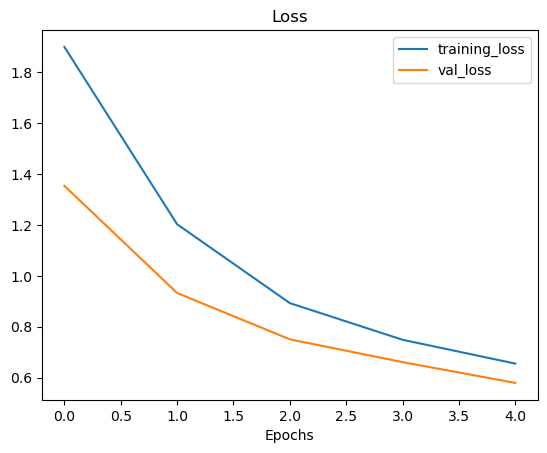

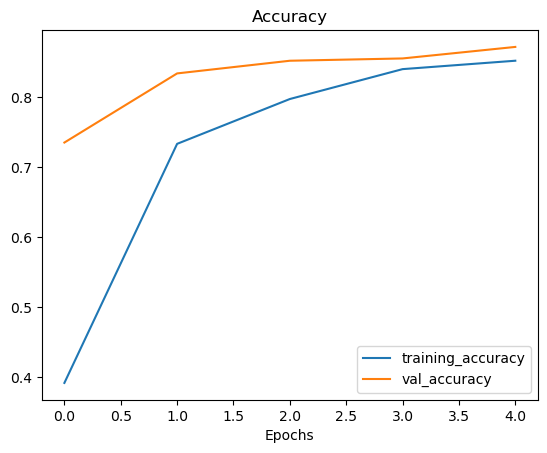

In [17]:
plot_loss_curves(history_0)

In [18]:
# Define input tensor shape (same number of dimensions as the output of efficientnetv2-b0)
input_shape = (1, 4, 4, 3)

# Create a random tensor
tf.random.set_seed(42)
input_tensor = tf.random.normal(input_shape)
print(f"Random input tensor:\n {input_tensor}\n")

# Pass the random tensor through a global average pooling 2D layer
global_average_pooled_tensor = tf.keras.layers.GlobalAveragePooling2D()(input_tensor)
print(f"2D global average pooled random tensor:\n {global_average_pooled_tensor}\n")

# Check the shapes of the different tensors
print(f"Shape of input tensor: {input_tensor.shape}")
print(f"Shape of 2D global averaged pooled input tensor: {global_average_pooled_tensor.shape}")

Random input tensor:
 [[[[ 0.3274686  -0.8426257   0.3194336 ]
   [-1.4075519  -2.3880599  -1.0392479 ]
   [-0.5573232   0.5397071   1.6994324 ]
   [ 0.28893656 -1.5066117  -0.26454768]]

  [[-0.5972242  -1.9171131  -0.6204413 ]
   [ 0.8504024  -0.4060477  -3.0258412 ]
   [ 0.9058465   0.29855984 -0.22561562]
   [-0.7616443  -1.891714   -0.9384712 ]]

  [[ 0.77852213 -0.47338897  0.97772706]
   [ 0.24694408  0.20573746 -0.5256234 ]
   [ 0.32410023  0.02545409 -0.10638493]
   [-0.6369476   1.1603122   0.25073594]]

  [[-0.41728497  0.40125772 -1.4145442 ]
   [-0.5931858  -1.6617215   0.3356716 ]
   [ 0.1081563   0.23479682 -0.56668764]
   [-0.35819843  0.8869861   0.5274477 ]]]]

2D global average pooled random tensor:
 [[-0.09368647 -0.45840445 -0.28855982]]

Shape of input tensor: (1, 4, 4, 3)
Shape of 2D global averaged pooled input tensor: (1, 3)


In [19]:
# lets replicate the GlobalAveragePool2D layer
tf.reduce_mean(input_tensor, axis=[1,2])

<tf.Tensor: shape=(1, 3), dtype=float32, numpy=array([[-0.09368647, -0.45840445, -0.28855982]], dtype=float32)>

In [21]:
unzip_data("10_food_classes_1_percent.zip")

In [22]:
train_dir_1_percent = "10_food_classes_1_percent/train/"
test_dir_1_percent = "10_food_classes_1_percent/test/"

In [23]:
walk_through_dir("10_food_classes_1_percent")

There are 2 directories and 0 images in '10_food_classes_1_percent'.
There are 10 directories and 0 images in '10_food_classes_1_percent/test'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/steak'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/sushi'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/fried_rice'

In [24]:
import tensorflow as tf

Image_size = (224,224)

train_data_1_percent = tf.keras.preprocessing.image_dataset_from_directory(train_dir_1_percent,
                                                                           image_size=Image_size,
                                                                           label_mode="categorical",
                                                                           batch_size=32)

test_data_1_percent= tf.keras.preprocessing.image_dataset_from_directory(test_dir_1_percent,
                                                                           image_size=Image_size,
                                                                           label_mode="categorical")
                                                                           

Found 70 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [25]:
# data Augmentation
tf.__version__

'2.14.0'

In [28]:
from tensorflow import keras
from tensorflow.keras import layers

Augmentation = keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2),
    layers.RandomHeight(0.2),
    layers.RandomWidth(0.2)
    # layers.Rescaling(1/255.) to scale image but we dont need it as we are working with efficientNet which is alredy scaled
], name="data_augmentation")

[[[ 83  42  48]
  [ 89  46  53]
  [ 94  47  55]
  ...
  [231 103  68]
  [230 101  70]
  [228  99  68]]

 [[ 83  41  45]
  [ 86  44  48]
  [ 89  42  48]
  ...
  [230 102  67]
  [229 100  68]
  [227  98  66]]

 [[ 85  40  43]
  [ 85  40  43]
  [ 86  37  40]
  ...
  [230 102  67]
  [229  99  65]
  [228  98  64]]

 ...

 [[225 129 107]
  [204 105  82]
  [200  95  74]
  ...
  [192  58  31]
  [194  55  34]
  [201  60  43]]

 [[202 112  86]
  [222 128 102]
  [223 123  99]
  ...
  [191  57  28]
  [194  53  33]
  [201  58  41]]

 [[217 130 102]
  [237 146 119]
  [215 117  90]
  ...
  [191  58  27]
  [195  53  33]
  [203  58  41]]]


2023-11-07 19:11:38.104142: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


tf.Tensor(
[[[[108.155045  131.96147    48.401974 ]
   [125.96072   147.35938    64.37528  ]
   [133.81822   151.71974    68.636406 ]
   ...
   [244.64146   110.641464   57.695717 ]
   [244.60258   109.95353    56.755085 ]
   [245.29503   110.248924   55.76144  ]]

  [[111.254395  135.29333    52.930515 ]
   [141.28288   162.91367    80.457466 ]
   [148.78944   166.93423    83.22674  ]
   ...
   [244.8211    110.821106   58.216663 ]
   [243.74472   109.51159    56.20328  ]
   [243.53523   108.71711    54.046833 ]]

  [[122.71919   146.32393    66.492874 ]
   [153.78157   174.64465    94.029884 ]
   [157.70085   175.33604    92.384254 ]
   ...
   [245.87871   112.15133    59.998146 ]
   [244.76387   110.832245   57.77955  ]
   [243.61995   109.07692    54.541653 ]]

  ...

  [[175.25253    51.0354     10.307826 ]
   [174.62126    48.614616    8.395589 ]
   [175.92413    48.611206    9.035552 ]
   ...
   [221.09442   128.61304    57.12195  ]
   [221.69504   129.45125    55.07216  ]
   [2

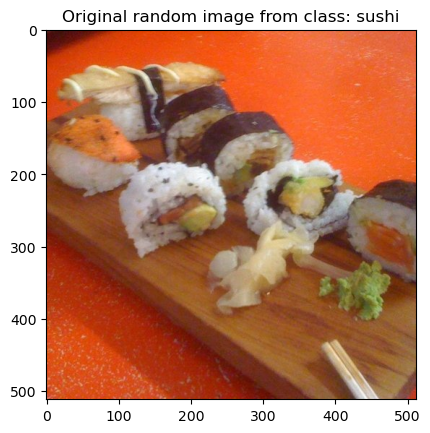

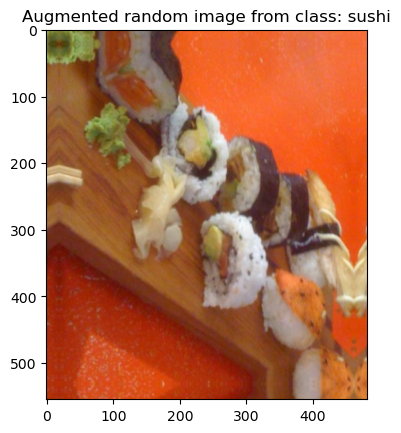

In [42]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import random

target_class = random.choice(train_data_1_percent.class_names)
target_dir = "10_food_classes_1_percent/train/" + target_class
random_image = random.choice(os.listdir(target_dir))
random_image_path = target_dir + "/" + random_image

img = mpimg.imread(random_image_path)
plt.imshow(img)
plt.title(f"Original random image from class: {target_class}")
print(img)

# augmented img
augmented_img = Augmentation(tf.expand_dims(img, axis=0))
plt.figure()
plt.imshow(tf.squeeze(augmented_img)/255.)
plt.title(f"Augmented random image from class: {target_class}")
print(augmented_img)

In [43]:
# feature extraction 1%
input_shape = (224,224,3)

base_model = tf.keras.applications.efficientnet_v2.EfficientNetV2B0(include_top=False)
base_model.trainable = False

inputs = layers.Input(shape=input_shape, name="Input_layer")

# data augmentation

x = Augmentation(inputs)

x = base_model(x, training=False)

x = layers.GlobalAveragePooling2D(name="Global_average_pooling_layer")(x)

outputs = layers.Dense(10, activation="softmax", name="output_layer")(x)

model_1 = keras.Model(inputs, outputs)

model_1.compile(loss = "categorical_crossentropy",
                optimizer=tf.keras.optimizers.legacy.Adam(),
                metrics=["accuracy"])

history_1_percent = model_1.fit(train_data_1_percent,
                        epochs=5,
                        steps_per_epoch=len(train_data_1_percent),
                        validation_data=test_data_1_percent,
                        validation_steps=int(0.25 * len(test_data_1_percent)))

Epoch 1/5


2023-11-07 19:55:02.516166: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


1/3 [=========>....................] - ETA: 37s - loss: 2.4628 - accuracy: 0.1562

2023-11-07 19:55:18.663977: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


2/3 [===================>..........] - ETA: 8s - loss: 2.3647 - accuracy: 0.1406 

2023-11-07 19:55:26.957197: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


3/3 [==============================] - 55s 18s/step - loss: 2.3384 - accuracy: 0.1714 - val_loss: 2.2623 - val_accuracy: 0.1497
Epoch 2/5


2023-11-07 19:55:54.863112: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


1/3 [=========>....................] - ETA: 20s - loss: 2.2266 - accuracy: 0.1875

2023-11-07 19:56:04.888016: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


2/3 [===================>..........] - ETA: 4s - loss: 2.1144 - accuracy: 0.2500 

2023-11-07 19:56:09.660510: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


3/3 [==============================] - 30s 10s/step - loss: 2.1507 - accuracy: 0.2286 - val_loss: 2.1338 - val_accuracy: 0.2632
Epoch 3/5


2023-11-07 19:56:24.868205: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


1/3 [=========>....................] - ETA: 20s - loss: 1.9855 - accuracy: 0.3438

2023-11-07 19:56:34.893087: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


2/3 [===================>..........] - ETA: 5s - loss: 1.9783 - accuracy: 0.3750 

2023-11-07 19:56:40.853988: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


3/3 [==============================] - 30s 10s/step - loss: 1.9807 - accuracy: 0.3857 - val_loss: 2.0052 - val_accuracy: 0.3717
Epoch 4/5


2023-11-07 19:56:54.649885: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


1/3 [=========>....................] - ETA: 16s - loss: 1.9613 - accuracy: 0.3125

2023-11-07 19:57:03.144363: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


2/3 [===================>..........] - ETA: 10s - loss: 1.8712 - accuracy: 0.4375

2023-11-07 19:57:13.723629: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


3/3 [==============================] - 24s 8s/step - loss: 1.8378 - accuracy: 0.4571 - val_loss: 1.9361 - val_accuracy: 0.4227
Epoch 5/5


2023-11-07 19:57:18.676718: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


1/3 [=========>....................] - ETA: 17s - loss: 1.7535 - accuracy: 0.5938

2023-11-07 19:57:27.636307: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


2/3 [===================>..........] - ETA: 9s - loss: 1.7242 - accuracy: 0.5469 

2023-11-07 19:57:37.429956: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


3/3 [==============================] - 31s 11s/step - loss: 1.7147 - accuracy: 0.5286 - val_loss: 1.8463 - val_accuracy: 0.4622


In [45]:
result_1_percent_data_aug = model_1.evaluate(test_data_1_percent)
result_1_percent_data_aug

79/79 [==============================] - 24s 302ms/step - loss: 1.8254 - accuracy: 0.4872


[1.8253908157348633, 0.487199991941452]

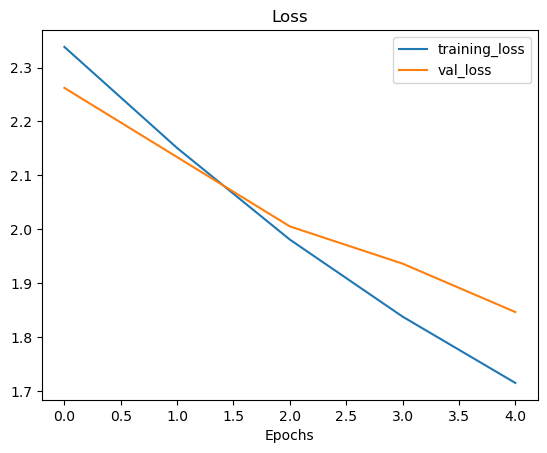

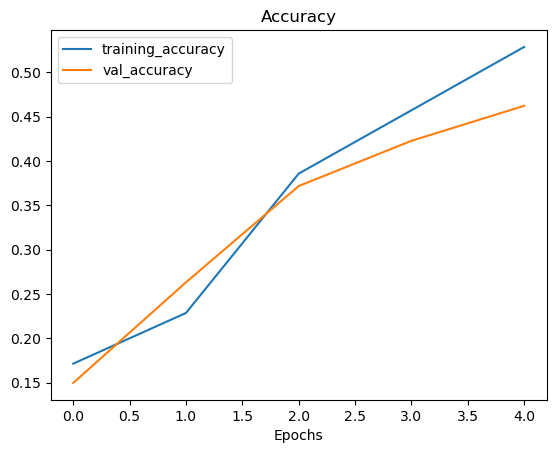

In [46]:
plot_loss_curves(history_1_percent)

In [47]:
# feature extraction 1%
input_shape = (224,224,3)

base_model = tf.keras.applications.efficientnet_v2.EfficientNetV2B0(include_top=False)
base_model.trainable = False

inputs = layers.Input(shape=input_shape, name="Input_layer")

# data augmentation

x = Augmentation(inputs)

x = base_model(x, training=False)

x = layers.GlobalAveragePooling2D(name="Global_average_pooling_layer")(x)

outputs = layers.Dense(10, activation="softmax", name="output_layer")(x)

model_10 = keras.Model(inputs, outputs)

model_10.compile(loss = "categorical_crossentropy",
                optimizer=tf.keras.optimizers.legacy.Adam(),
                metrics=["accuracy"])

history_10_percent = model_10.fit(train_data_10_percent,
                        epochs=5,
                        steps_per_epoch=len(train_data_10_percent),
                        validation_data=test_data_10_percent,
                        validation_steps=int(0.25 * len(test_data_10_percent)))

Epoch 1/5


2023-11-07 20:16:30.578506: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 1/24 [>.............................] - ETA: 7:34 - loss: 2.2908 - accuracy: 0.1562

2023-11-07 20:16:47.061147: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 2/24 [=>............................] - ETA: 2:23 - loss: 2.3299 - accuracy: 0.1406

2023-11-07 20:16:53.591001: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 3/24 [==>...........................] - ETA: 2:50 - loss: 2.3752 - accuracy: 0.1250

2023-11-07 20:17:03.319813: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 4/24 [====>.........................] - ETA: 2:57 - loss: 2.3746 - accuracy: 0.1094

2023-11-07 20:17:13.709462: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 5/24 [=====>........................] - ETA: 2:09 - loss: 2.3202 - accuracy: 0.1375

2023-11-07 20:17:14.376278: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 6/24 [======>.......................] - ETA: 1:47 - loss: 2.2945 - accuracy: 0.1510

2023-11-07 20:17:16.905554: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 7/24 [=======>......................] - ETA: 1:51 - loss: 2.2754 - accuracy: 0.1830

2023-11-07 20:17:26.302509: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 8/24 [=========>....................] - ETA: 1:49 - loss: 2.2536 - accuracy: 0.1836

2023-11-07 20:17:34.976193: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 9/24 [==========>...................] - ETA: 1:49 - loss: 2.2385 - accuracy: 0.1910

2023-11-07 20:17:45.613820: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


10/24 [===========>..................] - ETA: 1:45 - loss: 2.2343 - accuracy: 0.1969

2023-11-07 20:17:54.565940: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


11/24 [============>.................] - ETA: 1:34 - loss: 2.2212 - accuracy: 0.2045

2023-11-07 20:17:59.831722: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


12/24 [==============>...............] - ETA: 1:30 - loss: 2.2027 - accuracy: 0.2188

2023-11-07 20:18:10.259988: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


13/24 [===============>..............] - ETA: 1:21 - loss: 2.1814 - accuracy: 0.2284

2023-11-07 20:18:15.968440: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


14/24 [================>.............] - ETA: 1:14 - loss: 2.1725 - accuracy: 0.2299

2023-11-07 20:18:23.392412: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


KeyboardInterrupt: 

In [ ]:
result_10_percent_data_aug = model_10.evaluate(test_data_10_percent)
result_10_percent_data_aug

In [ ]:
plot_loss_curves(history_10_percent)